# Manipulación de datos - solución

El ejercicio consiste en:
1. Cargar los datos
2. Unión
3. Limpieza
4. Análisis
5. Visualización

## 1 - Cargar los datos
Utilizar pandas para importar los csv de las acciones de Amazon, Google y Apple ubicados en la carpeta Stock con nombres AAPL, AMZN y GOOG. Comencemos por cargar un único csv y analizando las primeras columnas.

In [1]:
### SOLUCIÓN
import pandas as pd

apple = pd.read_csv('Stock/AAPL.csv')

# Analizar primeros datos
apple.head()

Date      Open      High       Low     Close  Adj Close     Volume
0  2000-01-03  3.745536  4.017857  3.631696  3.997768   3.596616  133949200
1  2000-01-04  3.866071  3.950893  3.613839  3.660714   3.293384  128094400
2  2000-01-05  3.705357  3.948661  3.678571  3.714286   3.341579  194580400
3  2000-01-06  3.790179  3.821429  3.392857  3.392857   3.052405  191993200
4  2000-01-07  3.446429  3.607143  3.410714  3.553571   3.196992  115183600

Para este ejercicio nos interesarán únicamente las columnas `Date` y `Adj Close`. Podemos usar el parámetro usecols para no cargar datos irrelevantes.

También buscaremos identificar las fechas como tales, y no como simples strings. Para ello se recomienda utilizar el parámetro parse_dates de la función read_csv().

Utilicemos también el parémetro 'index_col' para indicar que queremos que el índice de nuestro dataframe sea la fecha de cada registro en vez de serlo un número entero.

Ahora cargar los datos de las tres empresas, con estas consideraciones.

In [2]:
### SOLUCIÓN
apple = pd.read_csv('Stock/AAPL.csv',usecols=['Date','Adj Close'], parse_dates=True,index_col=['Date'])
amazon = pd.read_csv('Stock/AMZN.csv',usecols=['Date','Adj Close'], parse_dates=True,index_col=['Date'])
google = pd.read_csv('Stock/GOOG.csv',usecols=['Date','Adj Close'], parse_dates=True,index_col=['Date'])

In [3]:
# Analicemos los datos cargados
apple.head()

Adj Close
Date                 
2000-01-03   3.596616
2000-01-04   3.293384
2000-01-05   3.341579
2000-01-06   3.052405
2000-01-07   3.196992

In [4]:
# Analicemos los datos cargados
amazon.head()

Adj Close
Date                 
2000-01-03    89.3750
2000-01-04    81.9375
2000-01-05    69.7500
2000-01-06    65.5625
2000-01-07    69.5625

In [5]:
# Analicemos los datos cargados
google.head()

Adj Close
Date                 
2004-08-19  49.845802
2004-08-20  53.805050
2004-08-23  54.346527
2004-08-24  52.096165
2004-08-25  52.657513

## 2 - Unir los datos

Ahora crearemos un único Dataframe que contenga los Adj Close de cada empresa. 

Empezaremos por crear un Dataframe vacío que tenga las fechas entre `2000-01-01` y `2016-12-31` como índices. Usaremos la función `pd.date_range()` para ello.

In [6]:
# Creamos las fechas para usar como índices
dates = pd.date_range('2000-01-01', '2016-12-31')

# Creamos un dataframe con los índices seleccionados
all_companies = pd.DataFrame(index = dates)

Antes de juntar todos los dataframe, debemos renombrar las columnas que hoy se llaman 'Adj Close' para todas las empresas para poder distinguirlos entre sí. Explorar la función `pd.DataFrame.rename()` para ello.

In [7]:
### SOLUCIÓN
google = google.rename(columns={'Adj Close': 'Google'})
apple = apple.rename(columns={'Adj Close': 'Apple'})
amazon = amazon.rename(columns={'Adj Close': 'Amazon'})

In [8]:
# Verifiquemos la solución
google.head()

Google
Date                 
2004-08-19  49.845802
2004-08-20  53.805050
2004-08-23  54.346527
2004-08-24  52.096165
2004-08-25  52.657513

In [9]:
# Verifiquemos la solución
amazon.head()

Amazon
Date               
2000-01-03  89.3750
2000-01-04  81.9375
2000-01-05  69.7500
2000-01-06  65.5625
2000-01-07  69.5625

In [10]:
# Verifiquemos la solución
apple.head()

Apple
Date                
2000-01-03  3.596616
2000-01-04  3.293384
2000-01-05  3.341579
2000-01-06  3.052405
2000-01-07  3.196992

Ahora usemos la función `dataframe.join()` para unir todas las acciones en un único dataframe.

In [11]:
### SOLUCIÓN
all_companies = all_companies.join(google)
all_companies = all_companies.join(amazon)
all_companies = all_companies.join(apple)

In [12]:
# Verifiquemos la solución
all_companies.head()

Google   Amazon     Apple
2000-01-01     NaN      NaN       NaN
2000-01-02     NaN      NaN       NaN
2000-01-03     NaN  89.3750  3.596616
2000-01-04     NaN  81.9375  3.293384
2000-01-05     NaN  69.7500  3.341579

## 3 - Limpieza de datos

Notar como tenemos valores NaN en algunos campos. Buscar y eliminar todos los campos NaN que haya.

In [13]:
### SOLUCIÓN
# Contemos cuántos datos faltan por cada columna
missing_values = all_companies.isnull().sum()
print(missing_values)

Google    3095
Amazon    1933
Apple     1933
dtype: int64


In [14]:
### SOLUCIÓN
# Eliminar todos los registros que contengan un NaN
clean_data = all_companies.dropna()
missing_values = clean_data.isnull().sum()
print(missing_values)

Google    0
Amazon    0
Apple     0
dtype: int64


## 4 - Análisis de los datos

Ahora que no tenemos datos inválidos, calculemos algunos datos estadísticos.

In [15]:
### SOLUCIÓN
# Calcular el promedio de cada columna (mean)
mean = clean_data.mean(axis=0)
print(mean)

Google    347.420229
Amazon    216.598177
Apple      47.736018
dtype: float64


In [16]:
### SOLUCIÓN
# Calcular la mediana de cada columna (median)
median = clean_data.median(axis=0)
print(median)

Google    286.397247
Amazon    161.820007
Apple      39.461483
dtype: float64


In [17]:
### SOLUCIÓN
# Calcular la desviación estándar de cada columna (std)
std = clean_data.std(axis=0)
print(std)

Google    187.671596
Amazon    199.129792
Apple      37.421555
dtype: float64


In [18]:
### SOLUCIÓN
# Calcular la correlación entre las columnas (corr)
corr = clean_data.corr()
print(corr)

          Google    Amazon     Apple
Google  1.000000  0.952444  0.900242
Amazon  0.952444  1.000000  0.886321
Apple   0.900242  0.886321  1.000000


Nos puede también interesar analizar tendencias, por ejemplo el promedio de la acción para los últimos N días. Podemos hacer eso con la función `dataframe.rolling().mean()`.

Calculemos el promedio de los últimos 30 días con dicha función para cada acción.

In [22]:
### SOLUCIÓN
rollingMean = clean_data.rolling(120).mean()
rollingMean.sample(5)

Google      Amazon       Apple
2009-08-06  193.617828   77.495666   16.131422
2006-08-09  192.606324   34.769417    8.167913
2006-01-05  170.886879   44.522917    7.246429
2015-05-11  532.823549  354.026334  114.691067
2010-03-17  277.850559  121.438834   25.833784

## 5 - Visualización
Ahora simplemente utilizaremos la librería matplotlib para graficar los datos analizados.

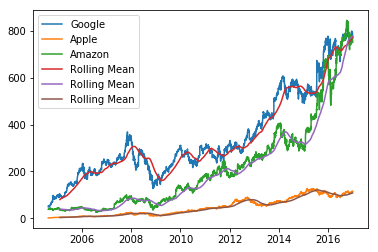

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

# Graficamos precios de la acción
plt.plot(clean_data['Google'])
plt.plot(clean_data['Apple'])
plt.plot(clean_data['Amazon'])

# Graficamos promedios de ventana móvil calculados
plt.plot(rollingMean)
plt.legend(['Google','Apple','Amazon','Rolling Mean','Rolling Mean','Rolling Mean'])
plt.show()

Probar calcular el promedio de una ventana móvil de mayor cantidad de días (120 por ejemplo) y compararlo con estos datos.

In [21]:
# Parte opcional
...